# Graphs
This notebook contains the graphs used in the data review chapter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Import Cryptoassets dataset and graph

In [44]:
infodf = pd.read_excel('****Name_Ticker_fundamentals.xlsx',sheet_name = 'py')

In [45]:
eventdf = pd.read_excel('****Crypto_Dataset_event.xlsx',sheet_name = 'py')

In [46]:
std = infodf['raised_amount'].std()
mean = infodf['raised_amount'].mean()

In [47]:
std/1e6

67.8044215957804

In [48]:
mean/1e6

23.225596961127593

In [49]:
infodf_filt = infodf[infodf['raised_amount'] <= 1.4e8]

In [50]:
#Count ERC20 standard
num_of_erc = sum(infodf['token_standard']=='ERC20')

In [51]:
#pct of ERC20
pct_of_erc = num_of_erc/len(infodf)

In [52]:
round(pct_of_erc,3)

0.799

In [53]:
num_of_utility = sum(infodf['role_of_token']=='Utility')

In [54]:
pct_of_utility = num_of_utility/len(infodf)

In [55]:
pct_of_utility 

0.8838526912181303

In [56]:
#security %
1-pct_of_utility 

0.11614730878186974

In [68]:
infodf.describe()

,soft_cap,hard_cap,target_amount,raised_amount,total_num_of_tokens
count,8.300000e+01,2.080000e+02,2.960000e+02,3.370000e+02,3.170000e+02
mean,5.318777e+06,3.862811e+07,9.828191e+07,2.322560e+07,4.520074e+10
std,8.659983e+06,1.786391e+08,1.221238e+09,6.780442e+07,4.660115e+11
min,0.000000e+00,1.200000e+04,1.950000e+02,1.000000e+04,3.000000e+04
25%,5.000000e+05,1.500000e+06,1.145000e+06,2.550000e+06,1.000000e+08
50%,2.500000e+06,1.265000e+07,1.000000e+07,1.060000e+07,5.000000e+08
75%,5.000000e+06,3.000000e+07,2.682500e+07,2.158000e+07,1.200000e+09
max,5.000000e+07,2.500000e+09,2.100000e+10,1.000000e+09,8.000000e+12


# graphs

In [15]:
df = pd.read_excel('merged_final.xlsx')
#df

##### convert to USD what is not in USD

In [16]:
a = df['currency'][(df['asset_class'] == 'cryptoasset') & (df['currency'] != 'USD')].dropna()
b = df['currency'][(df['asset_class'] == 'cryptoasset') & (df['currency'] == 'USD')]
len(a)/len(b)
#nearly 96% are exprssed in USD, so I think there is no need to get crazy converting other currencies

0.04229607250755287

In [17]:
df['raised_amount'][df['asset_class'] == 'IPO'].mean()/1e6

66.52523798042168

In [18]:
df['raised_amount'][df['asset_class'] == 'IPO'].std()/1e6

37.72189306632065

In [19]:
iposet = pd.read_excel('selected ipo under 140 filtered by shared offered.xlsx')

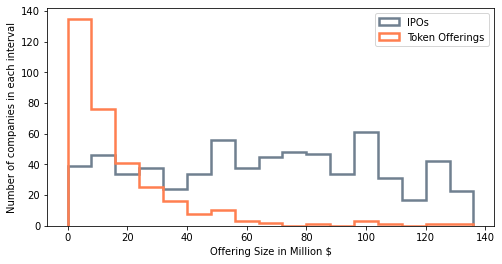

In [43]:
plt.figure(figsize=(8,4))

plt.hist(df['raised_amount'][df['asset_class'] == 'IPO']/1e6,
         bins=np.arange(0,140,8), histtype='step', edgecolor='slategray',
         linewidth=2.5, label = 'IPOs')

plt.hist(df['raised_amount'][(df['asset_class'] == 'cryptoasset') & (df['currency'] == 'USD')]/1e6,
         bins=np.arange(0,140,8), histtype='step', edgecolor="coral",
         linewidth=2.5, label = 'Token Offerings')

#plt.title('Distribution of IPO and Tokens Offering', fontsize = 14,weight='bold')
plt.xlabel('Offering Size in Million $')
plt.ylabel('Number of companies in each interval')
plt.legend(fontsize = 'medium')



plt.savefig('images/Distribution of IPO and Tokens Offering.png',  dpi=900,  transparent=True)
plt.savefig('images/Distribution of IPO and Tokens Offering.jpeg',  dpi=900)
plt.show()

In [21]:
avg_offered_c = (df['offered_number'][df['asset_class'] == 'cryptoasset'].dropna()/df['total_number'][df['asset_class'] == 'cryptoasset'].dropna()).mean()

In [22]:
avg_offered_ipo = (df['offered_number'][df['asset_class'] == 'IPO']/df['total_number'][df['asset_class'] == 'IPO']).mean()

In [23]:
avg_offered_c

0.383081033349053

In [24]:
avg_offered_ipo

0.21957816984099948

In [25]:
d = {'index_': ['cryptoasset','IPO'],
     'Offered':[avg_offered_c, avg_offered_ipo],
     'Held':   [1-avg_offered_c, 1-avg_offered_ipo] }
df1 = pd.DataFrame(d)
df1.set_index('index_', inplace = True)
df1.round(2)

,Offered,Held
index_,,
cryptoasset,0.38,0.62
IPO,0.22,0.78


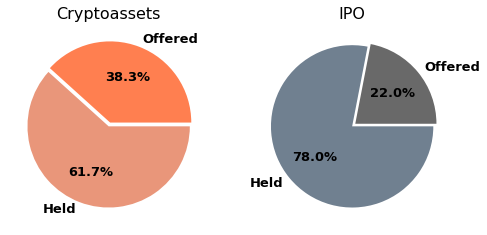

In [26]:
data1 = df1.iloc[0]
data2 = df1.iloc[1]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
textprops={'fontsize': 18}
# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', labels = ['Offered', 'Held'], 
        colors = ['coral', 'darksalmon'], explode=[0.05, 0], textprops={'fontsize': 13, 'weight':'bold'})
ax2.pie(data2, autopct='%1.1f%%', labels = ['Offered', 'Held'], 
        colors = ['dimgray', 'slategray'], explode=[0.05, 0], textprops={'fontsize': 13, 'weight':'bold'})

ax1.set_title('Cryptoassets', fontsize = 16)
ax2.set_title('IPO', fontsize = 16)

plt.savefig('images/Share of offered tokens or shares.png',  dpi=900,  transparent=True)
plt.savefig('images/Share of offered tokens or shares.jpeg',  dpi=900)

plt.show()

In [27]:
class_ = df['class'].unique()
class_

array(['Web Services', 'IT Services', 'Communication', 'Currency',
       'Financial Services', 'Healthcare', 'Real Estate',
       'Goods and Utilities', 'Industrials', 'Other'], dtype=object)

In [28]:
crypto = []
for i in class_:
    crypto.append(sum((df['asset_class'] == 'cryptoasset') & (df['class'] == i)))

In [29]:
crypto

[76, 108, 17, 17, 115, 8, 9, 4, 0, 0]

In [30]:
ipo = []
for k in class_:
    ipo.append(sum((df['asset_class'] == 'IPO') & (df['class'] == k)))

In [31]:
sum(ipo)

664

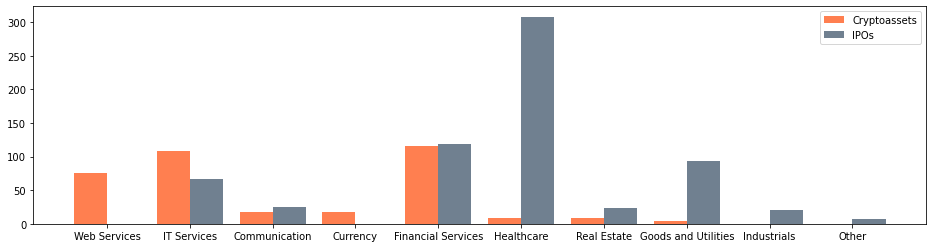

In [32]:
plt.figure(figsize=(16,4))

  
X_axis = np.arange(len(class_))
  
plt.bar(X_axis - 0.2, crypto, 0.4, label = 'Cryptoassets', color ='coral')
plt.bar(X_axis + 0.2, ipo, 0.4, label = 'IPOs', color = 'slategray')
plt.xticks(X_axis,class_ ) 



plt.savefig('images/barchart by sector.png',  dpi=900,  transparent=True)
plt.savefig('images/barchart by sector.jpeg',  dpi=900)

plt.legend()

plt.show()

## Distribution of only IT services and Financial services.

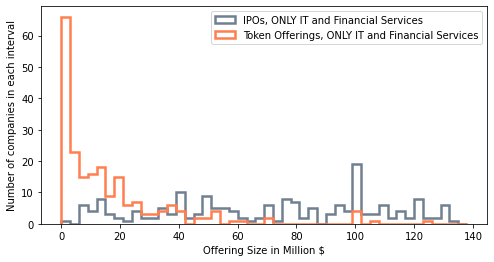

In [33]:
plt.figure(figsize=(8,4))

plt.hist(df['raised_amount'][(df['asset_class']== 'IPO') & ((df['class'] == 'IT Services') | (df['class'] == 'Financial Services'))]/1e6,
         bins=np.arange(0,140,3), histtype='step', edgecolor='slategray',
         linewidth=2.5, label = 'IPOs, ONLY IT and Financial Services')

plt.hist(df['raised_amount'][(df['asset_class']== 'cryptoasset') & ((df['class'] == 'IT Services') | (df['class'] == 'Financial Services'))]/1e6,
         bins=np.arange(0,140,3), histtype='step', edgecolor="coral",
         linewidth=2.5, label = 'Token Offerings, ONLY IT and Financial Services')

#plt.title('Distribution of IPO and Tokens Offering', fontsize = 14,weight='bold')
plt.xlabel('Offering Size in Million $')
plt.ylabel('Number of companies in each interval')
plt.legend(fontsize = 'medium')



plt.savefig('images/Distribution IT and Fin.png',  dpi=900,  transparent=True)
plt.savefig('images/Distribution IT and Fin.jpeg',  dpi=900)
plt.show()

## Try to figure out the average size per sector

In [34]:
crypto_ = []
for i in class_:
    temp = df['raised_amount'][(df['asset_class'] == 'cryptoasset') & (df['class'] == i)]
    crypto_.append(temp.mean())

In [35]:
crypto_

[31123625.866666667,
 18953764.841121495,
 13474705.88235294,
 52168235.294117644,
 22826782.494594596,
 20291428.57142857,
 24311646.42857143,
 15667500.0,
 nan,
 nan]

In [36]:
ipo_ = []
for k in class_:
    temp = df['raised_amount'][(df['asset_class'] == 'IPO') & (df['class'] == k)]
    ipo_.append(temp.mean())

In [37]:
ipo_

[nan,
 66040966.47761194,
 54446781.6,
 nan,
 73742986.37815127,
 66847212.96428572,
 63214886.958333336,
 62988416.52127659,
 55002035.35,
 69196800.85714285]

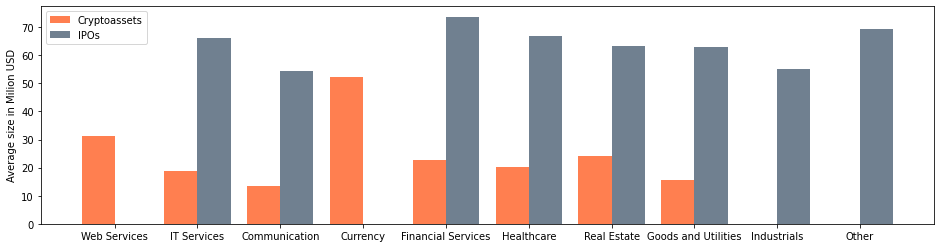

In [38]:
plt.figure(figsize=(16,4))

  
X_axis = np.arange(len(class_))
  
plt.bar(X_axis - 0.2, crypto_, 0.4, label = 'Cryptoassets', color ='coral')
plt.bar(X_axis + 0.2, ipo_, 0.4, label = 'IPOs', color = 'slategray')
plt.xticks(X_axis,class_ ) 
plt.yticks(np.arange(0,80e6,10e6),np.arange(0,80,10))

plt.ylabel('Average size in Milion USD')

plt.savefig('images/barchart by size.png',  dpi=900,  transparent=True)
plt.savefig('images/barchart by size.jpeg',  dpi=900)

plt.legend()

plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [40]:
df['class_ML'] = LabelEncoder().fit_transform(df['class'])
df = df[df['raised_amount']<=2e8]
df['offering_ratio'] = df['offered_number']/df['total_number']

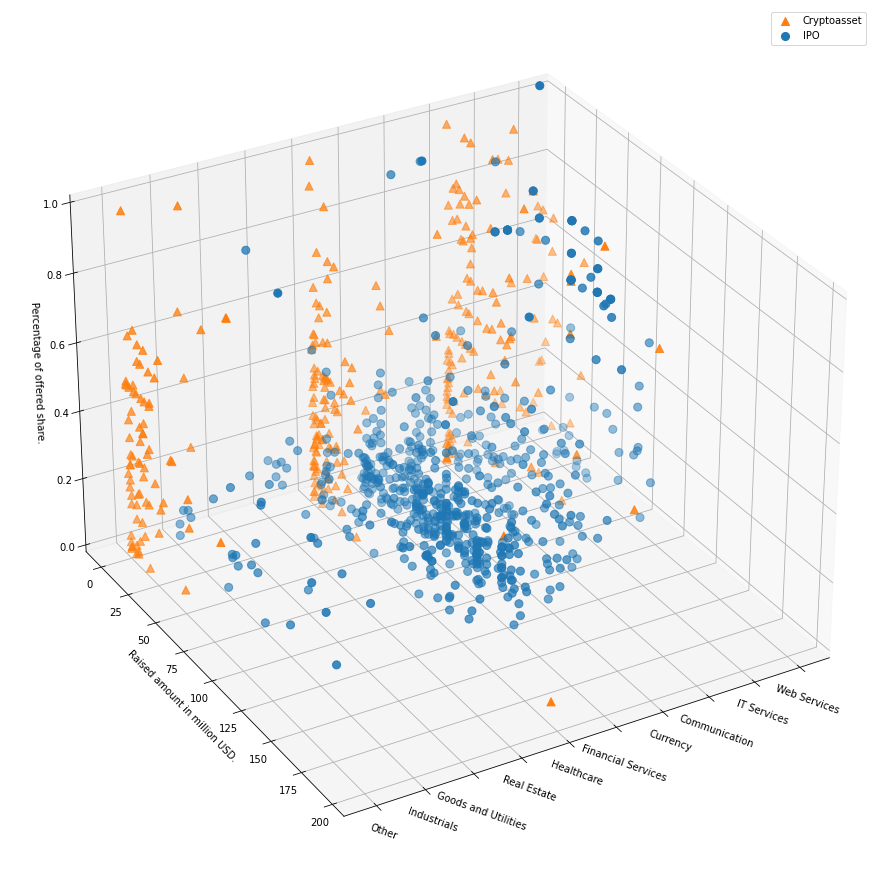

In [41]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)


xcc = df['class_ML'][df['asset_class'] == 'cryptoasset']
ycc = df['raised_amount'][df['asset_class'] == 'cryptoasset']/1e6
zcc = df['offering_ratio'][df['asset_class'] == 'cryptoasset']



xip = df['class_ML'][df['asset_class'] == 'IPO']
yip = df['raised_amount'][df['asset_class'] == 'IPO']/1e6
ziip = df['offering_ratio'][df['asset_class'] == 'IPO']

scatterip = ax.scatter(xip,yip,ziip, marker = 'o', s=65 )
scattercc = ax.scatter(xcc,ycc,zcc, marker = '^', s= 65 )


ax.set_xticks(range(0,len(df['class'].unique())))
ax.set_xticklabels(df['class'].unique(),rotation = -20)
#ax.set_xlabel('X Label')
ax.set_ylabel('Raised amount in million USD.')
ax.set_zlabel('Percentage of offered share.')
ax.set_zlim(0,1)
ax.view_init(30, 60)


plt.legend([scattercc, scatterip], ['Cryptoasset', 'IPO'])

plt.savefig('images/scatterplot 3D.png',  dpi=900,  transparent=True)
plt.savefig('images/scatterplot 3D.jpeg',  dpi=900)

plt.show()
